In [1]:
!pip install tensorflow


In [2]:
!pip install keras

In [3]:
from tensorflow.keras.backend import clear_session


# Limpiar la sesión anterior
clear_session()

In [4]:
import tensorflow as tf

from tensorflow.keras import models, layers, regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import numpy as np

# Cargar el CIFAR-10 Dataset

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalización de los valores de los píxeles

train_images, test_images = train_images / 255.0, test_images / 255.0

# Clases del CIFAR-10

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


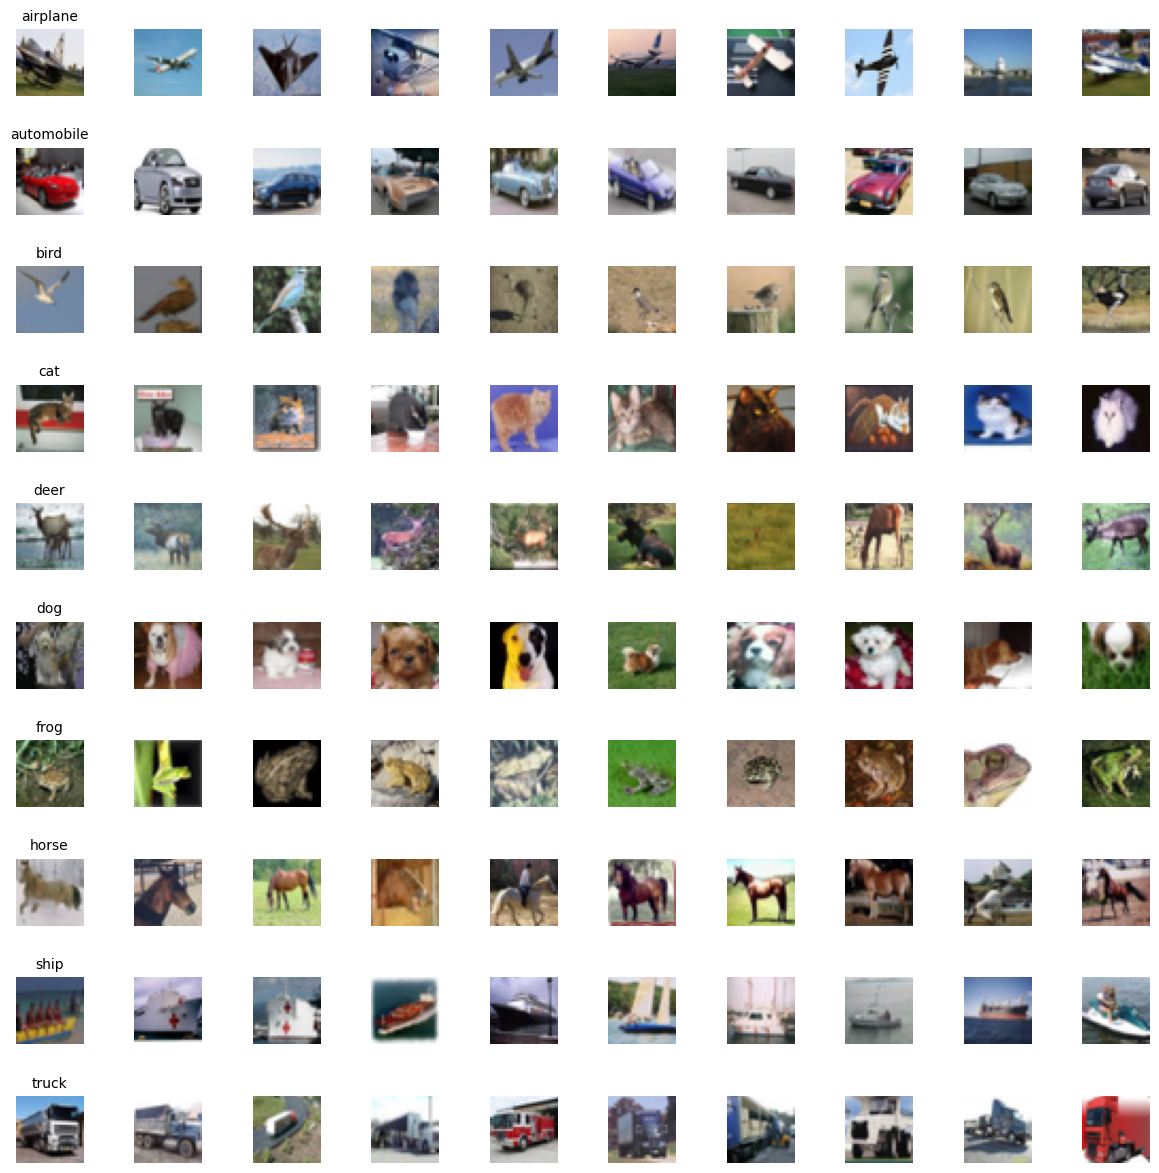

In [5]:
#Visualización de imágenes con leyendas

fig, axes = plt.subplots(10, 10, figsize=(12, 12))

fig.tight_layout()

for i in range(10):  # Loop through each class

    class_indices = np.where(test_labels[:, 0] == i)[0]  # Índices de imágenes de la clase i

    random_indices = np.random.choice(class_indices, 10, replace=False)  # Seleccionar 10 aleatorias

    for j, img_idx in enumerate(random_indices):

        axes[i, j].imshow(test_images[img_idx])  # Mostrar imagen

        axes[i, j].axis('off')  # Quitar ejes

        if j == 0:

            # Agregar título con el nombre de la clase

            axes[i, j].set_title(class_names[i], fontsize=10)

plt.show()

In [ ]:

# Crear un modelo CNN optimizado
model = models.Sequential([
    # Bloque 1
    layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Bloque 2
    layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Bloque 3
    layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    # Capa Global Average Pooling
    layers.GlobalAveragePooling2D(),

    # Capa totalmente conectada
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Capa de salida
    layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=early_stopping)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.3985 - loss: 2.8395 - val_accuracy: 0.3424 - val_loss: 2.8847
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.6683 - loss: 1.7379 - val_accuracy: 0.6380 - val_loss: 1.6528
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7547 - loss: 1.3097 - val_accuracy: 0.5527 - val_loss: 1.8922
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.7939 - loss: 1.0588 - val_accuracy: 0.6893 - val_loss: 1.2990
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8186 - loss: 0.9189 - val_accuracy: 0.5737 - val_loss: 1.6667
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8383 - loss: 0.8228 - val_accuracy: 0.6303 - val_loss: 1.4921
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8478 - loss: 0.7664 - val_accuracy: 0.6840 - val_loss: 1.3165
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8561 - loss: 0.7374 - 

In [ ]:
model.save("Final.keras")

In [6]:
import tensorflow as tf

from tensorflow.keras import models, layers, regularizers

from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import numpy as np

model = load_model("Final.keras")

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [ ]:
print(f'Final Training Accuracy: {train_acc[-1]:.4f}')
print(f'Final Validation Accuracy: {val_acc[-1]:.4f}')

Final Training Accuracy: 0.9449
Final Validation Accuracy: 0.7342


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8332 - loss: 0.8888
Test Accuracy: 0.8332


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.83      0.85      1000
  automobile       0.93      0.91      0.92      1000
        bird       0.83      0.72      0.77      1000
         cat       0.64      0.79      0.71      1000
        deer       0.93      0.69      0.79      1000
         dog       0.80      0.78      0.79      1000
        frog       0.77      0.93      0.85      1000
       horse       0.83      0.91      0.87      1000
        ship       0.92      0.87      0.90      1000
       truck       0.90      0.90      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



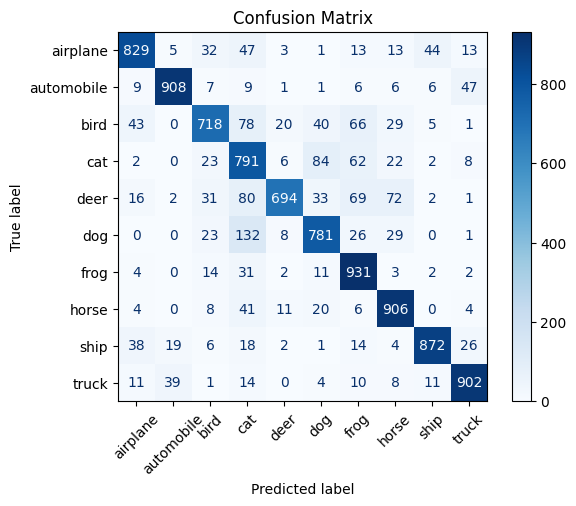

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np


y_pred = np.argmax(model.predict(test_images), axis=1)


print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))


cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks(np.arange(10), class_names, rotation=45)
plt.yticks(np.arange(10), class_names)
plt.show()

In [17]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Cargar el modelo InceptionV3 preentrenado sin la capa de salida
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Crear el modelo de transferencia
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)  # CIFAR-10 tiene 10 clases

model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Cambiar el tamaño de las imágenes de CIFAR-10 a 75x75 para InceptionV3
train_images_resized = tf.image.resize(train_images, (75, 75))
test_images_resized = tf.image.resize(test_images, (75, 75))

# Entrenar el modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_images_resized, train_labels,
                    batch_size=64,
                    epochs=50,
                    validation_data=(test_images_resized, test_labels),
                    callbacks=[early_stopping])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 48ms/step - accuracy: 0.3308 - loss: 1.9348 - val_accuracy: 0.5834 - val_loss: 1.2673
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 24ms/step - accuracy: 0.5518 - loss: 1.2955 - val_accuracy: 0.6095 - val_loss: 1.1632
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5935 - loss: 1.1725 - val_accuracy: 0.6239 - val_loss: 1.1174
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6148 - loss: 1.0999 - val_accuracy: 0.6305 - val_loss: 1.0918
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6417 - loss: 1.0339 - val_accuracy: 0.6313 - val_loss: 1.0749
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.6543 - loss: 0.9898 - val_accuracy: 0.6343 - val_loss: 1.0650
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6695 - loss: 0.9542 - val_accuracy: 0.6362 - val_loss: 1.0538
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6833 - loss: 0.9150 - 

In [19]:
# Evaluar la precisión en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images_resized, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 - 5s - 15ms/step - accuracy: 0.6462 - loss: 1.0358
Test Accuracy: 0.65
